In [60]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


In [48]:
# Load the insurance dataset

mydata = pd.read_csv('insurance.csv')

In [49]:
mydata.shape

(1338, 7)

In [50]:
mydata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
mydata.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [51]:
mydata.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11676F10>,
      dtype=object)

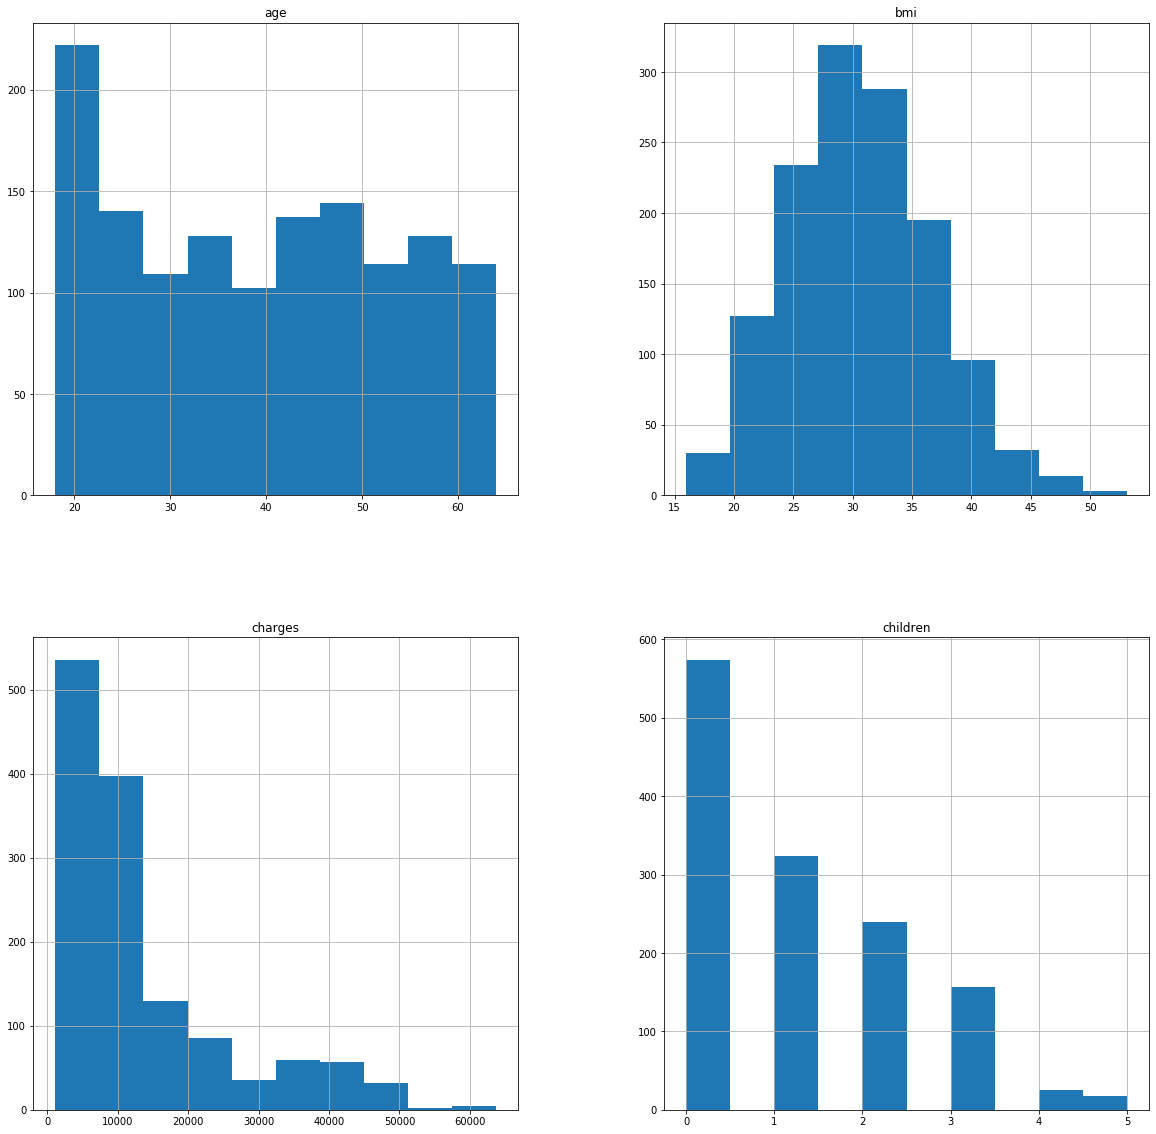

In [39]:
mydata.hist(figsize=(20,20))

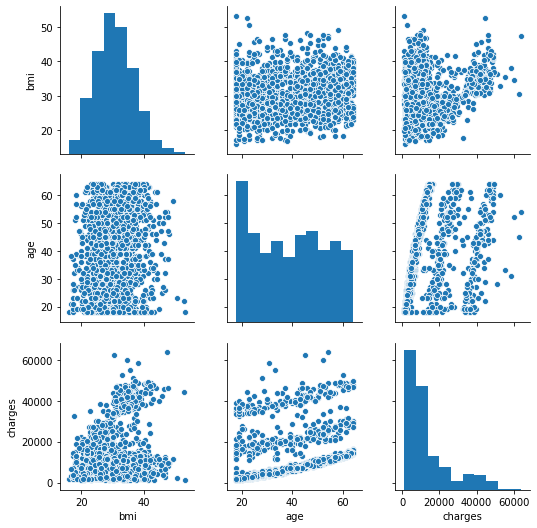

In [53]:
sns.pairplot(mydata[['bmi', 'age', 'charges']])

In [56]:
mydata.skew(axis = 0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

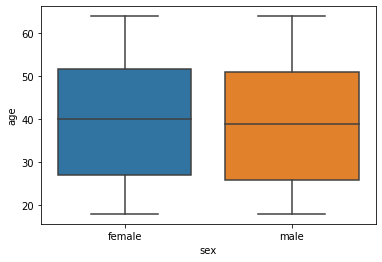

In [57]:
sns.boxplot(x ='sex', y ='age', data =mydata)

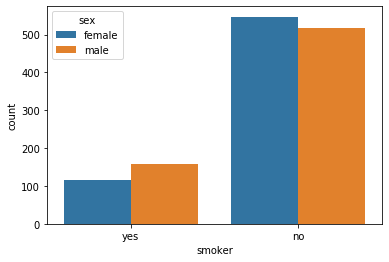

In [13]:
sns.countplot(x="smoker",hue="sex", data=mydata)

In [15]:
pd.pivot_table(mydata, index=['region','sex'], columns=['smoker'], aggfunc=len)

age        bmi       charges       children    
smoker             no yes     no   yes      no   yes       no yes
region    sex                                                    
northeast female  132  29  132.0  29.0   132.0  29.0      132  29
          male    125  38  125.0  38.0   125.0  38.0      125  38
northwest female  135  29  135.0  29.0   135.0  29.0      135  29
          male    132  29  132.0  29.0   132.0  29.0      132  29
southeast female  139  36  139.0  36.0   139.0  36.0      139  36
          male    134  55  134.0  55.0   134.0  55.0      134  55
southwest female  141  21  141.0  21.0   141.0  21.0      141  21
          male    126  37  126.0  37.0   126.0  37.0      126  37

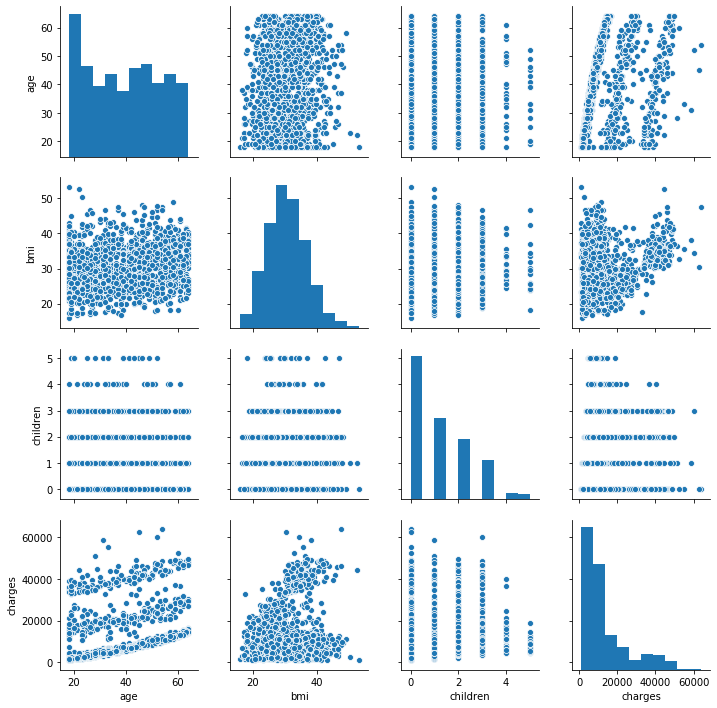

In [16]:
sns.pairplot(mydata)

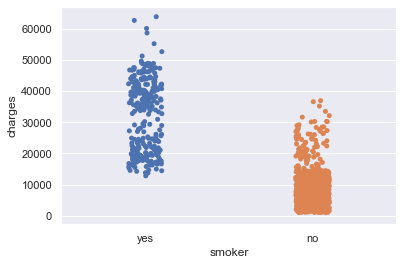

In [61]:
sns.stripplot(mydata['smoker'], mydata['charges'])

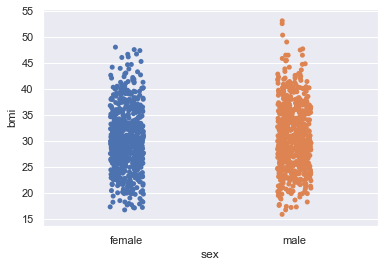

In [63]:
sns.stripplot(mydata['sex'], mydata['bmi'])

In [14]:
pd.crosstab(mydata['smoker'], mydata['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


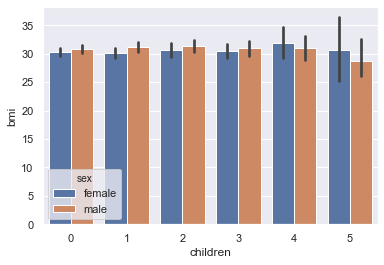

In [69]:
sns.barplot(mydata['children'], mydata['bmi'], hue=mydata['sex'])

In [17]:
mydata['age'].std()

14.049960379216172

In [18]:
mydata['age'].mean()

39.20702541106129

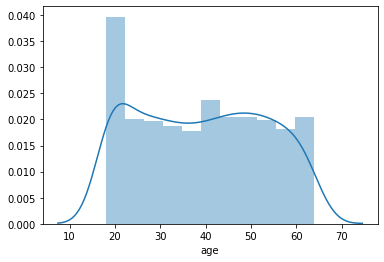

In [40]:
sns.distplot(mydata['age'])

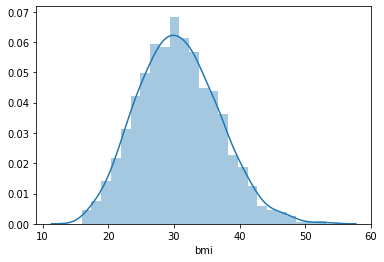

In [20]:
sns.distplot(mydata['bmi'])

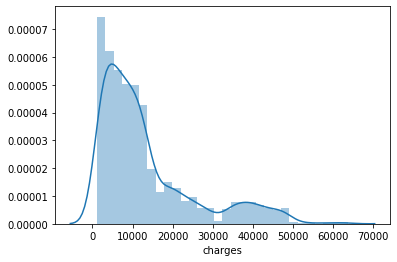

In [41]:
sns.distplot(mydata['charges'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10770190>,
      dtype=object)

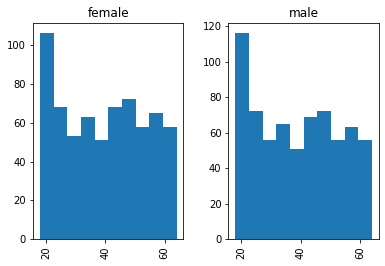

In [21]:
mydata.hist(by='sex', column='age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10A46CF0>,
      dtype=object)

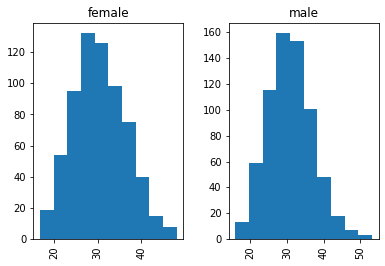

In [25]:
mydata.hist(by='sex', column='bmi')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10EEEF90>,
      dtype=object)

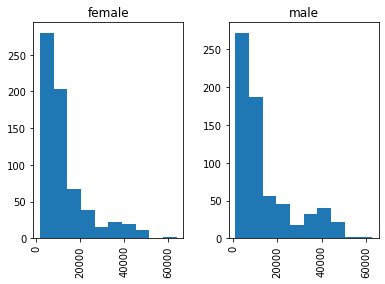

In [26]:
mydata.hist(by='sex', column='charges')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11498830>,
      dtype=object)

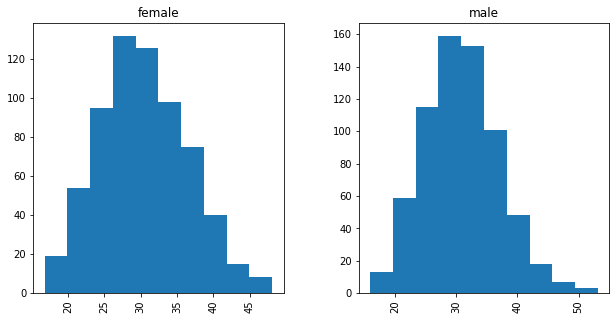

In [37]:
mydata.hist(by='sex', column='bmi', figsize=(10,5))

In [33]:
corr = mydata.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


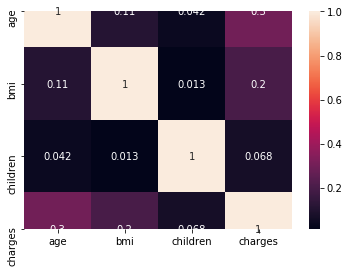

In [35]:
sns.heatmap(corr, annot=True)

In [43]:
# Simple linear regression


# Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['charges']
x = mydata[['age','bmi']]

# train the model using training sets
regr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
regr.coef_

array([241.9307779 , 332.96509081])

In [45]:
regr.intercept_

-6424.804612240765

In [ ]:
#charges predicted = -6424.80 + 241.930*age + 332.96*bmi